In [18]:
import os
os.chdir(r"C:\Users\NooR\Downloads\Web Scraping\selenum scrapping\animals")
try:
    os.mkdir("dataset_download")
except:
    pass

In [19]:
import os
import time
import urllib.request
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from PIL import Image
from io import BytesIO


Skipped small image https://www.google.com/tia/tia.png with size 27x23
Skipped small image  with size 46x46
Skipped small image  with size 69x46
Skipped small image  with size 46x58
Skipped small image  with size 64x46
Skipped small image  with size 61x46
Skipped small image data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== with size 1x1
Error downloading image https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg: cannot identify image file <_io.BytesIO object at 0x00000282219A4D60>
Skipped small image  with size 16x16
Skipped small image  with size 16x16
Skipped small image  with size 16x16
Skipped small image  with size 310x163
Skipped small image  with size 16x16
Skipped small image data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAOUlEQVQ4jWNkQAL/zzD8ZyASMJowMDIwMDAwEasBF2DBZzo2gO5Kil0wasCoAYPDAKx5gZRcSbELAI9iCO7YkjH+AAAAAElFTkSuQmCC with size 16x16
Skipped small image  with size 16x16
Skipped small image  with size 290
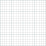
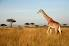
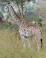
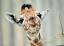
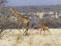
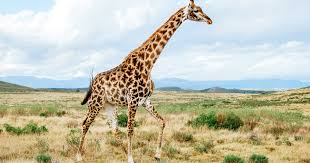
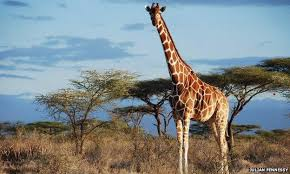
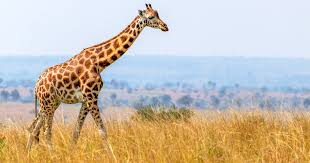
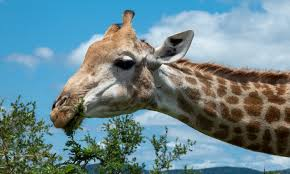
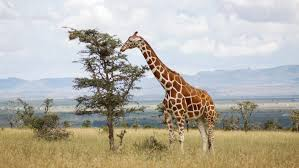
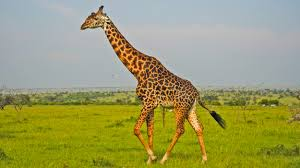
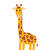
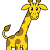
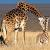
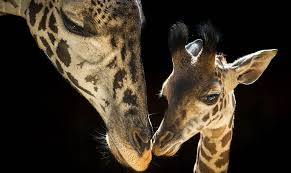
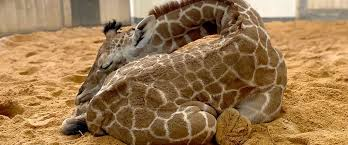

In [17]:


name = "giraffe"
chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option("excludeSwitches", ['enable-automation'])

# Specify the path to chromedriver.exe using Service
service = Service('chromedriver.exe')

# Initialize the WebDriver with the service and options
driver = webdriver.Chrome(service=service, options=chrome_options)

sttr = "https://www.google.com/search?q=giraffe&tbm=isch"
driver.get(sttr)

# Wait for images to load
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "img")))

links = []
x = 1
last_height = driver.execute_script("return document.body.scrollHeight")

def download_image(url, filename):
    try:
        resource = urllib.request.urlopen(url)
        img_data = resource.read()

        # Check image size using PIL (Pillow)
        img = Image.open(BytesIO(img_data))
        width, height = img.size

        # Skip images smaller than a specific resolution (e.g., 200x200)
        if width > 150 and height > 180:
            with open(filename, 'wb') as output:
                output.write(img_data)
        else:
            print(f"Skipped small image {url} with size {width}x{height}", flush=True)

    except Exception as e:
        print(f"Error downloading image {url}: {e}", flush=True)

try:
    while True:
        # Scroll down the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)  # Allow time for images to load

        # Re-fetch image elements
        pics = driver.find_elements(By.TAG_NAME, "img")

        for pic in pics:
            try:
                img_link = pic.get_attribute('src')
                if img_link and img_link not in links:
                    links.append(img_link)

                    os.makedirs(os.path.join('dataset_download', name), exist_ok=True)
                    file_name = os.path.join('dataset_download', name, f'{x}.jpg')
                    download_image(img_link, file_name)
                    x += 1
            except Exception as e:
                print(f"Error retrieving image: {e}", flush=True)

        # Check if new height is different from last height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

finally:
    driver.quit()
